# Probability Cheatsheet for Machine Learning

## 1.1 Regression Metrics

#### 1.1.2 Residuals
- **Definition**: The difference between observed and predicted values in regression.
- **Key Concepts**:
  - **Residuals Plot**: A graph to detect patterns that indicate model inadequacy.
  - **Homoscedasticity**: Residuals have constant variance (ideal scenario).
  - **Heteroscedasticity**: Residuals have non-constant variance (indicates model problems).


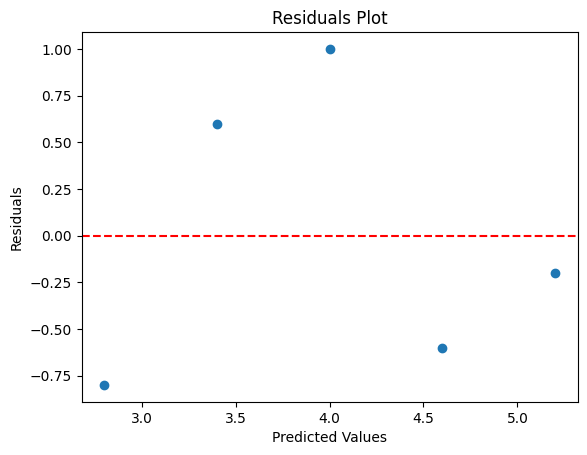

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='r', linestyle='--') 
plt.show()

#### 1.1.3 Effect Sizes
- **Cohen’s d**: Measures the size of the difference between two means.
- **R-Squared (Coefficient of Determination)**: Proportion of variance in the dependent variable explained by the independent variables in the model.
- **ROC Curve**: Plot showing the true positive rate vs. false positive rate.
  - **AUC (Area Under the Curve)**: Measures overall model performance.

```python
from sklearn.metrics import r2_score, roc_curve, auc

# Assuming you have y_true (true values) and y_pred (predicted probabilities) for a classification problem

# R-squared
r2 = r2_score(y_true, y_pred) 
print(f"R-squared: {r2}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
```


## 1.2 Probabilistic Theory

#### 1.2.1 Probabilistic Independence
- **Definition**: Two events are independent if the occurrence of one does not affect the probability of the other.
- **Calculation**: \( P(A \cap B) = P(A) \times P(B) \)

#### 1.2.2 Generative and Discriminative Models
- **Generative Models**: Learn the joint probability \( P(X, Y) \) (e.g., Naive Bayes, Gaussian Mixture Models).
- **Discriminative Models**: Learn the conditional probability \( P(Y | X) \) (e.g., Logistic Regression, SVM).

#### 1.2.3 Conditional Probabilities
- **Bayes' Theorem**: \( P(A|B) = \frac{P(B|A) P(A)}{P(B)} \)
- **Total Probability**: Used to find probabilities of complex events by breaking them down.

```python
# Example of Bayes' Theorem
prior_A = 0.3  # Prior probability of event A
likelihood_B_given_A = 0.8  # Likelihood of event B given A
likelihood_B_given_not_A = 0.2  # Likelihood of event B given not A

# Calculate P(B) using total probability
prob_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * (1 - prior_A))

# Calculate P(A|B) using Bayes' Theorem
posterior_A_given_B = (likelihood_B_given_A * prior_A) / prob_B

print(f"P(A|B) = {posterior_A_given_B}")
```

#### 1.2.4 Probability Distributions
- **Bernoulli Distribution**: Describes outcomes of a binary event.
- **Uniform Distribution**: All outcomes have equal probability.
- **Poisson Distribution**: Models the number of events occurring within a fixed interval.
- **Binomial Distribution**: Models the number of successes in a fixed number of trials.
- **Normal Distribution**: Bell-shaped curve, important for central limit theorem.

```python
import scipy.stats as stats
import numpy as np

# Bernoulli Distribution
p = 0.6 # Probability of success
bernoulli_rv = stats.bernoulli(p)
print(f"Bernoulli P(X=1): {bernoulli_rv.pmf(1)}")

# Normal Distribution
mu = 0 # Mean
sigma = 1 # Standard deviation
normal_rv = stats.norm(mu, sigma)
x = np.linspace(-3, 3, 100)
plt.plot(x, normal_rv.pdf(x))
plt.title("Normal Distribution PDF")
plt.show()
```

#### 1.2.5 Operations on Probabilities
- **Union of Events**: \( P(A \cup B) = P(A) + P(B) - P(A \cap B) \)
- **Intersection of Events**: \( P(A \cap B) = P(A) \times P(B) \) (if independent).
- **Complement**: \( P(\text{not A}) = 1 - P(A) \)

#### 1.2.6 Probability Density Function (PDF)
- **Mean**: The expected value of a random variable.
- **Variance**: Measure of how much values spread out around the mean.
- **Integral for Probability**: \( P(a \leq X \leq b) = \int_a^b f(x) dx \)

```python
# Example: Calculating probability from PDF of a Normal Distribution
mu = 0 
sigma = 1
normal_rv = stats.norm(mu, sigma)

# Probability that X is between -1 and 1
prob = normal_rv.cdf(1) - normal_rv.cdf(-1) 
print(f"P(-1 <= X <= 1) = {prob}") 
```

---

## 1.3 Similarities
- Both **Confusion Matrix** and **ROC Curve** are used to evaluate classification models.
- **Probability Distributions** like Bernoulli and Binomial are used for discrete events.
- **Generative and Discriminative Models** both attempt to classify data but with different approaches.

---

## 1.4 Differences
- **Confusion Matrix** provides performance at a specific threshold, while **ROC Curve** shows performance across thresholds.
- **Generative Models** focus on modeling data distribution (joint probability), while **Discriminative Models** focus on boundaries (conditional probability).
- **Residuals** are used in regression analysis, whereas **confusion matrices** apply to classification problems.